In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pulsar_stars.csv")

In [3]:
df.columns

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [4]:
df.head()
# We see that the target class is the 9th Column..!!

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


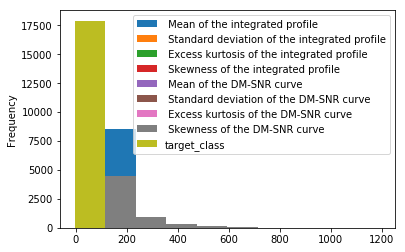

In [6]:
df.plot(kind='hist',bins=10)
plt.show()

<Figure size 936x1800 with 0 Axes>

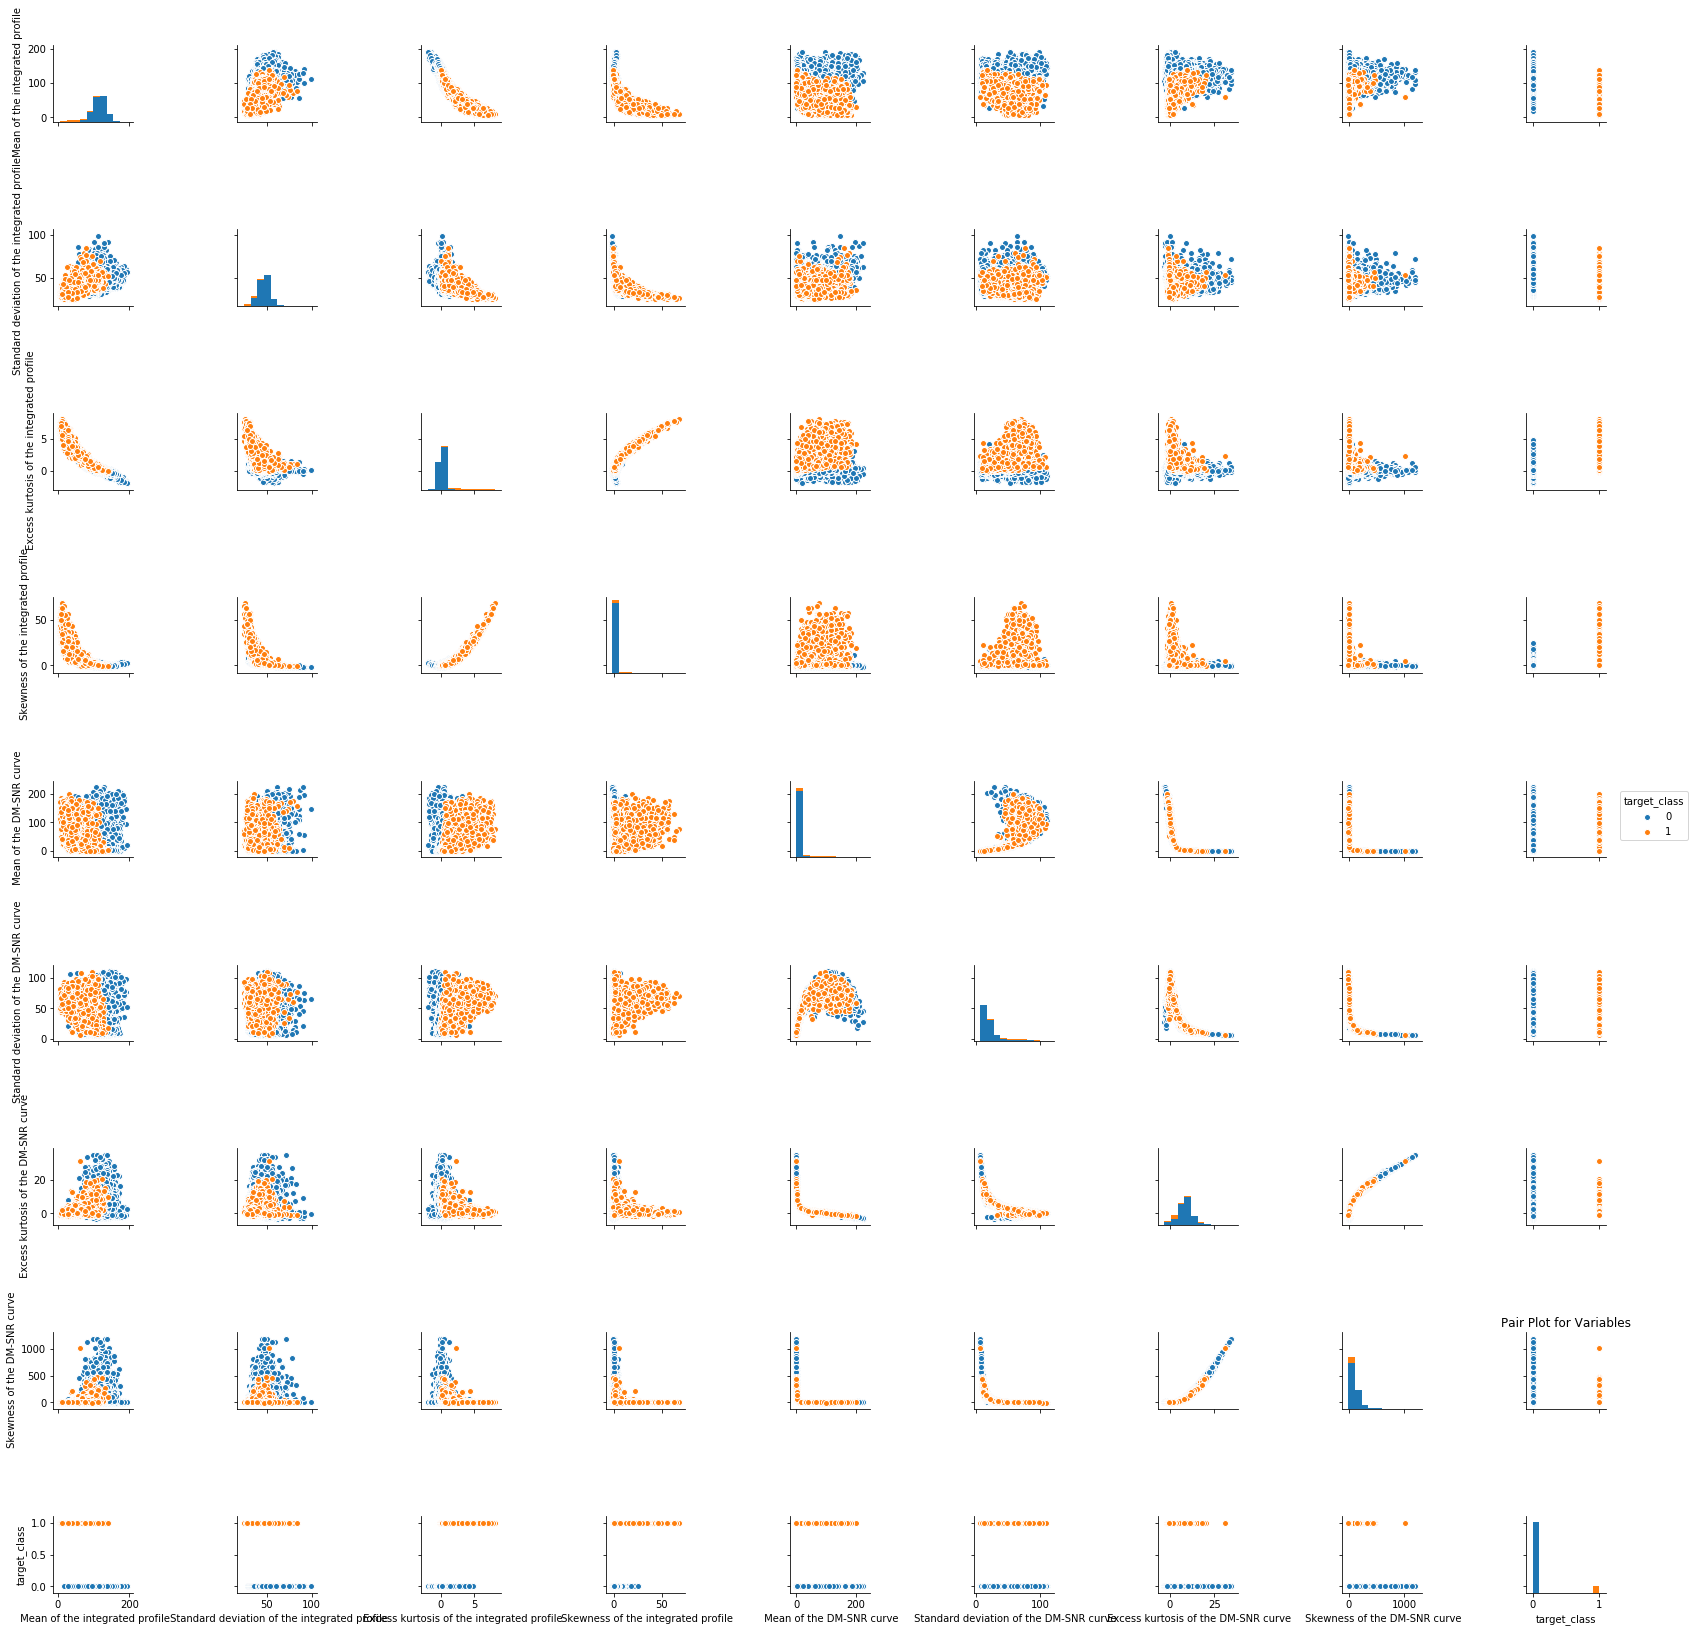

In [15]:
plt.figure(figsize=(13,25))
sns.pairplot(df,hue="target_class")
plt.title("Pair Plot for Variables")
plt.show();

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


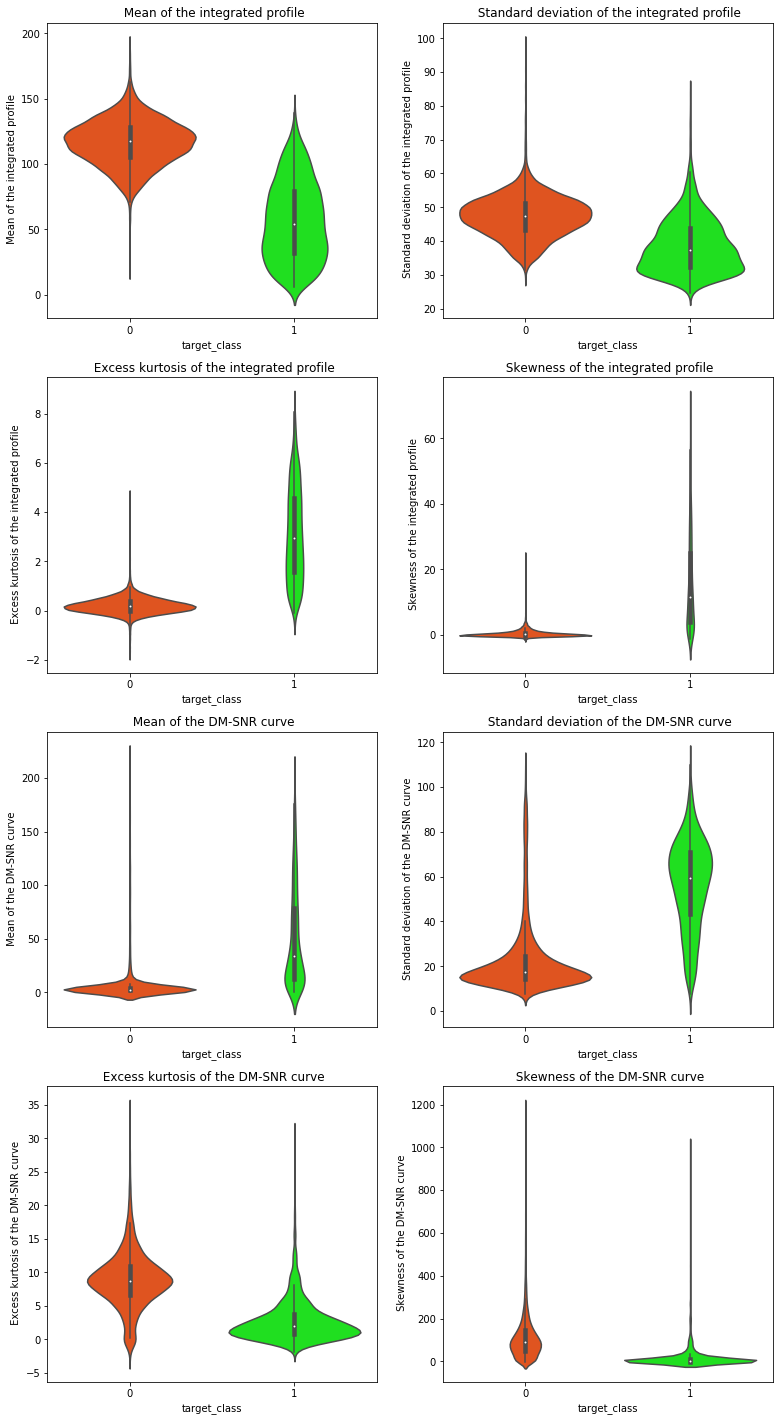

In [20]:
#Violin Plot
import itertools
columns = [x for x in df.columns if x not in["target_class"]]
length = len(columns)
plt.figure(figsize=(13,25))
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot(length/2,length/4,j+1)
    sns.violinplot(x=df["target_class"],y=df[i],palette = ["Orangered",'lime'],alpha = .5)
    plt.title(i)
    
#Awesome...we can see the variation of every feature with target class

In [23]:
#Now we will perform an approach to choose:
### Number of Components in a PCS Analysis
##The Data Set contains 17898 samples and 9 Attributes including "target_classs"

# We use the PCS model to Shrink a high dimension Matrix of MxN into a MxR where "R" is the suitable value chosen under PCA

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [28]:
#Now the step is to rescale the DATA to a range b/w 0 and 1 with MinMaxScaler
scaler = MinMaxScaler(feature_range=[0,1])
data_rescaled = scaler.fit_transform(df.values[1:,0:8])

In [36]:
#We selected samples from 1 to the end(df.values[1:,0:8]) because the first row of data contains the labels of each columns.
## Then we selected columns from 0 to 8 as last column(9th one) represents the class labels for each prediction.
data_rescaled.shape

(17897, 8)

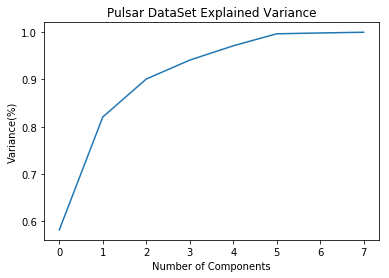

In [38]:
#After rescaling we can calculate the explained variance for each attribute by using scikit-learn and plot:
pca = PCA().fit(data_rescaled)
#Plot the cumulative summation:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)') #for each component
plt.title('Pulsar DataSet Explained Variance')
plt.show()

In [39]:
# The above graph tells us selecting 5 components we can preserve around 98% of the total variance
pca = PCA(n_components = 5)
df = pca.fit_transform(data_rescaled)

In [42]:
#More to come with Model Implementation and implementing the PCA
pca

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)